### **Handwritten Digit Classification - Mrunal Choudhari**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

**Reading the handwritten digit dataset**

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**View first image from train data**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

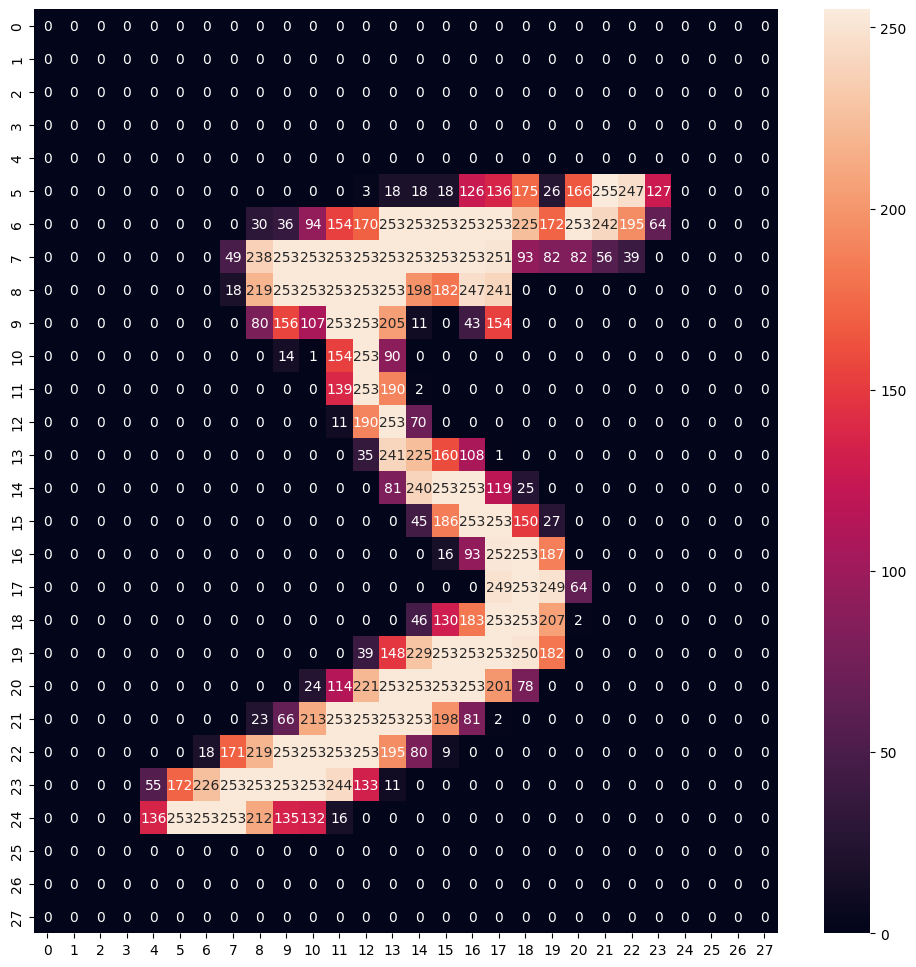

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [9]:
ytrain[0]

5

In [10]:
xtrain.shape

(60000, 28, 28)

**Visualize Top 9 images from xtrain data**

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


<Figure size 1000x1000 with 0 Axes>

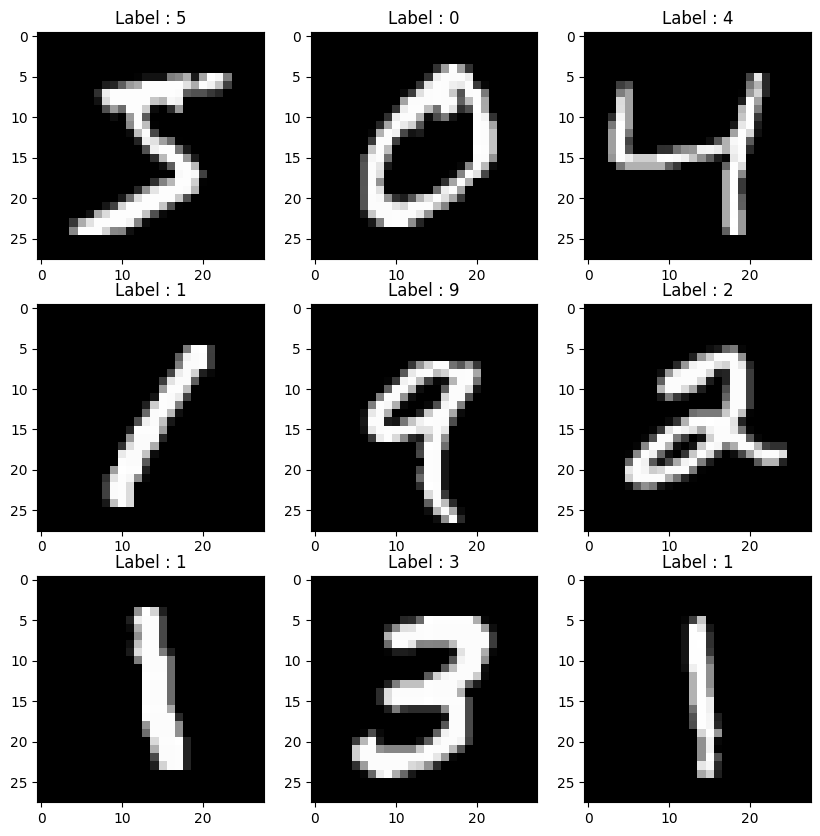

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Label : {ytrain[i]}')

In [13]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Because i have more than two classes above becomes multiclass classification problem**

**Preprocessing the data**

In [14]:
# Scale the x data divide by 255

xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255


In [15]:
# Apply one hot encoder on target feature because it multiclass classification problem

from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)


In [16]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### **Create a simple Covnet**

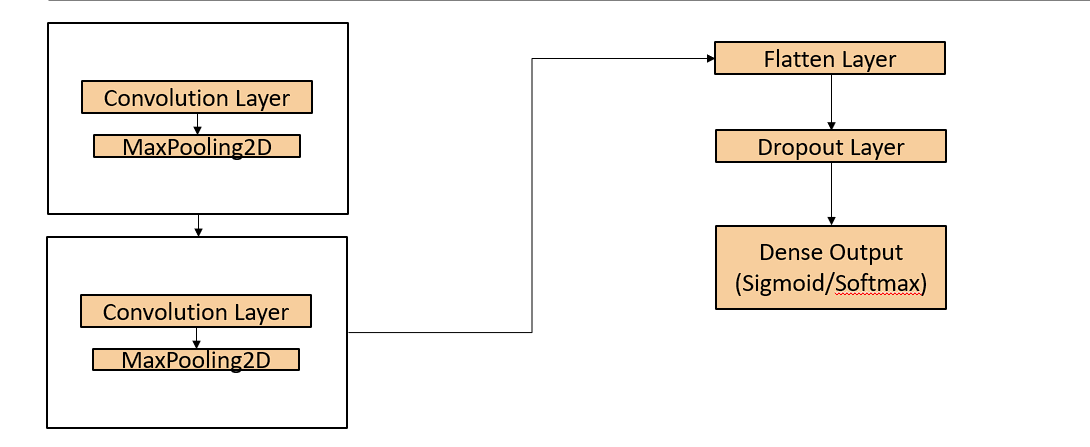



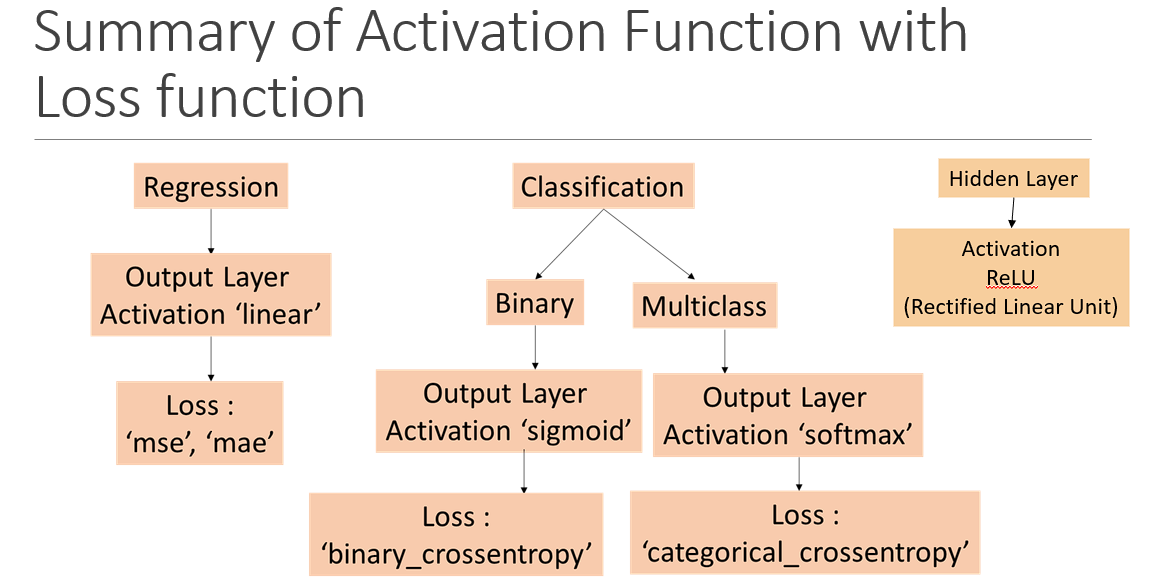

In [20]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [21]:
model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))
# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))
# Add flatten layer
model.add(Flatten())
# Dropout layer
model.add(Dropout(rate=0.5))
# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

**Compile the model**

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**TRain the neutral net**

In [24]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 16s 6ms/step - loss: 0.2220 - accuracy: 0.9309 - val_loss: 0.0572 - val_accuracy: 0.9845
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0654 - accuracy: 0.9794 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 4/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0549 - accuracy: 0.9821 - val_loss: 0.0319 - val_accuracy: 0.9913
Epoch 5/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 6/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9922
Epoch 7/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0415 - accuracy: 0.9866 - val_loss: 0.0284 - val_ac

**PLot the learning curve for the model**

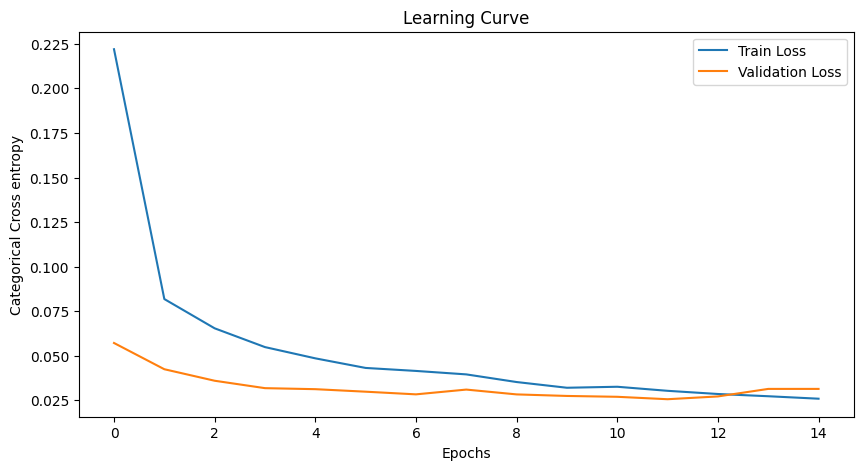

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Evaluate model in train and test**

In [26]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9964


[0.012731572613120079, 0.9963833093643188]

In [27]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0248 - accuracy: 0.9916


[0.024833830073475838, 0.991599977016449]

**Predict the probability for train and test**

In [29]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[5.34263692e-12, 1.74051843e-12, 2.08469200e-10, 6.84868894e-04,
        1.13859598e-16, 9.99314904e-01, 4.39145799e-15, 8.46984566e-11,
        1.22883165e-07, 8.32938909e-08],
       [9.99992132e-01, 2.16245140e-14, 7.10180257e-06, 3.01903419e-10,
        6.08054093e-11, 3.14762261e-09, 6.05329035e-07, 7.29299650e-13,
        7.48051647e-08, 3.50433602e-08],
       [6.11421310e-16, 2.06408011e-08, 1.46670831e-09, 2.53901778e-11,
        9.99981999e-01, 3.61408468e-08, 2.78511554e-11, 2.70190867e-06,
        1.57521953e-07, 1.51296399e-05],
       [1.23400854e-08, 9.99975324e-01, 1.94416671e-07, 2.57749880e-11,
        1.50749665e-05, 7.55263962e-10, 8.34084162e-08, 8.94595996e-06,
        3.67221475e-07, 1.80780848e-08],
       [1.63411331e-13, 3.50758940e-12, 1.07892173e-09, 6.49405996e-09,
        3.78712830e-05, 4.52271909e-09, 9.23105315e-15, 4.63855997e-07,
        6.51664550e-06, 9.99955058e-01]], dtype=float32)

In [31]:
yprob_train[0]

array([5.3426369e-12, 1.7405184e-12, 2.0846920e-10, 6.8486889e-04,
       1.1385960e-16, 9.9931490e-01, 4.3914580e-15, 8.4698457e-11,
       1.2288316e-07, 8.3293891e-08], dtype=float32)

**Predictions for train and test**

In [32]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [33]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [34]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [36]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

**PLot the confusion matrix**

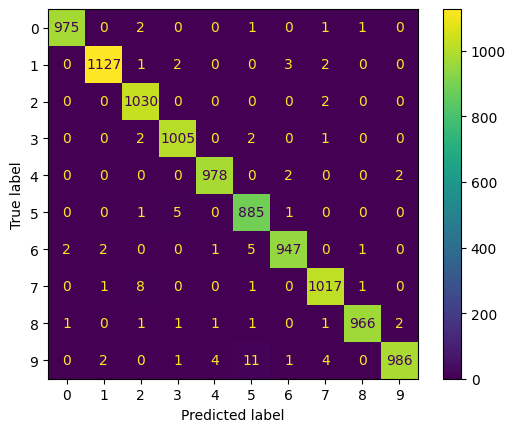

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

**Print the classification report**

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Saving the model for future use**

In [39]:
model.save('HandwrittenModel.keras')

**Load the above model**

In [40]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0